**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2024*

----

# Exploración de datos

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

In [ ]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Representación de los ejemplos

La tarea sobre la que nos centraremos es **estimar el precio de cada propiedad**, sabiendo el resto de sus características.

El primer paso de todo análisis es realizar una exploración de los datos y analizar las distribuciones de sus variables. Es decir, aplicar las herramientas que hemos estudiado durante la materia anterior, Análisis y Visualización de Datos. Por este motivo, no entraremos en detalles en esta notebook, sino que será parte de la ejercitación práctica.

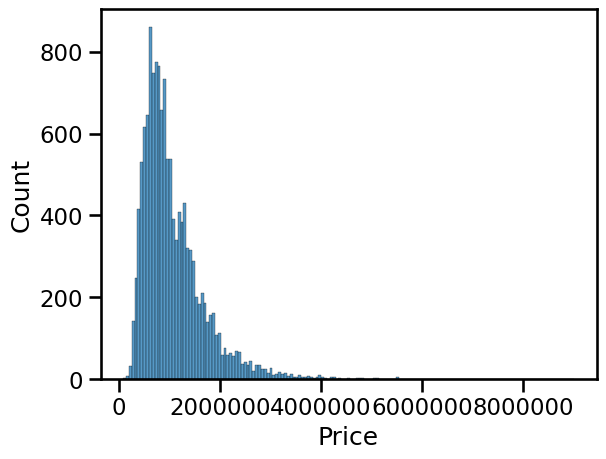

In [ ]:
seaborn.histplot(melb_df.Price.dropna())
plt.ticklabel_format(style='plain', axis='x')

plt.show()

Luego de que tenemos una idea aproximada de la forma y el significado de cada una de las variables en nuestro conjunto de datos, tenemos que comenzar a pensar qué tan útiles son para mi tarea de predicción en particular.

## Fechas

Las fechas representan la variable *tiempo*, que no es trivial de representar en mi conjunto de datos.

* ¿Cómo afecta el tiempo al fenómeno que quiero estudiar?
* ¿Es importante de manera absoluta o de manera relativa?
* ¿Con qué nivel de precisión (o con qué escala) es relevante? ¿Años, días, minutos? ¿Importa la zona horaria?

Además de estas preguntas conceptuales, tenemos que tener en cuenta con qué tipo de datos (de Python) están representadas estas fechas:

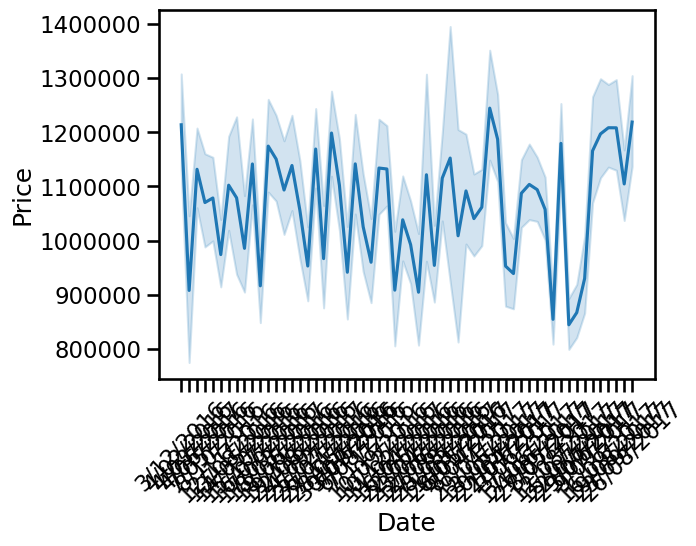

In [ ]:
seaborn.lineplot(data=melb_df, x='Date', y='Price')
plt.xticks(rotation=45);
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Al leer el dataset, las fechas fueron reconocidas como strings. Podemos cambiar el tipo de datos a `datetime`, que es una estructura de datos diseñada para trabajar con fechas hasta una precisión de milisegundos.

In [ ]:
melb_df['date'] = pandas.to_datetime(melb_df.Date)

<ipython-input-9-33458036d011>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  melb_df['date'] = pandas.to_datetime(melb_df.Date)


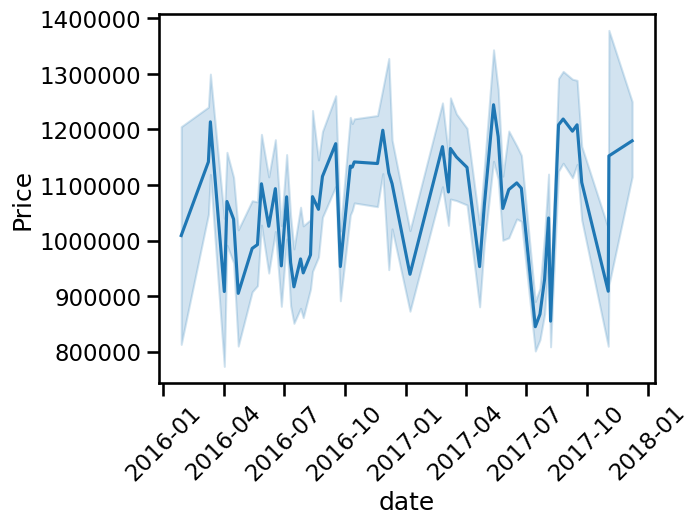

In [ ]:
seaborn.lineplot(data=melb_df, x='date', y='Price')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Podemos considerar que el día no es importante para este conjunto de datos, y que sólo está aportando ruido.

Para extraer sólo el mes de una fecha, aplicamos una función a cada fila.

In [ ]:
melb_df['date_month'] = pandas.to_datetime(melb_df.date.dt.strftime('%Y-%m'))

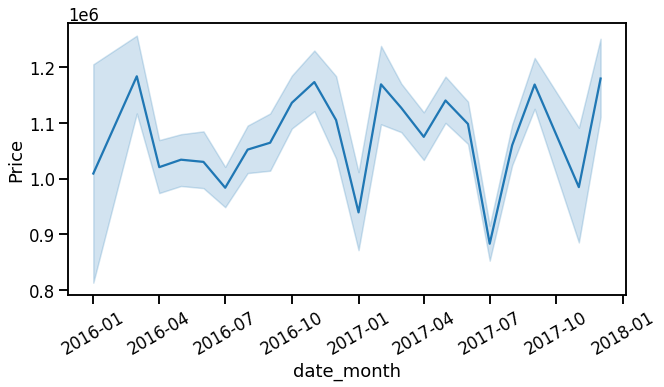

In [ ]:
fig = plt.figure(figsize=(10, 5))
seaborn.lineplot(data=melb_df.sort_values('date_month'), x='date_month', y='Price')
plt.xticks(rotation=30);

## Ejercicio

En lugar de utilizar una precisión de meses, utilizar cuatrimestres para representar la fecha. Realizar una visualización del cambio de precios con respecto al año y al cuatrimestre.

Nota: investigue si existe una función en pandas para esto.